# Bell States with Qiskit

## 1. What are Bell States?

Bell states are the **four maximally entangled two-qubit states**.  
They form an **orthonormal basis** for the two-qubit Hilbert space.  

They are important in **quantum information** because:  
- They show **maximal entanglement**.  
- They are used in **quantum teleportation, superdense coding, and quantum cryptography**.  
- They are test cases for many **quantum algorithms**.  

The four Bell states are:

- $|\Phi^{+}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$  
- $|\Phi^{-}\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$  
- $|\Psi^{+}\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$  
- $|\Psi^{-}\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$  

These are also called **EPR pairs**.

---

## 2. How to Create Bell States in Circuits

We usually use:

- **Hadamard gate (H):** creates superposition  
- **CNOT gate:** creates entanglement  
- **X or Z gates:** to flip states or add phase  


In [ ]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt


### Bell State $|\Phi^{+}\rangle$
- $|\Phi^{+}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$ 

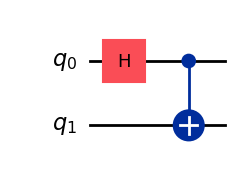

In [7]:
qc_phi_plus = QuantumCircuit(2)
qc_phi_plus.h(0)
qc_phi_plus.cx(0, 1)
qc_phi_plus.draw("mpl")


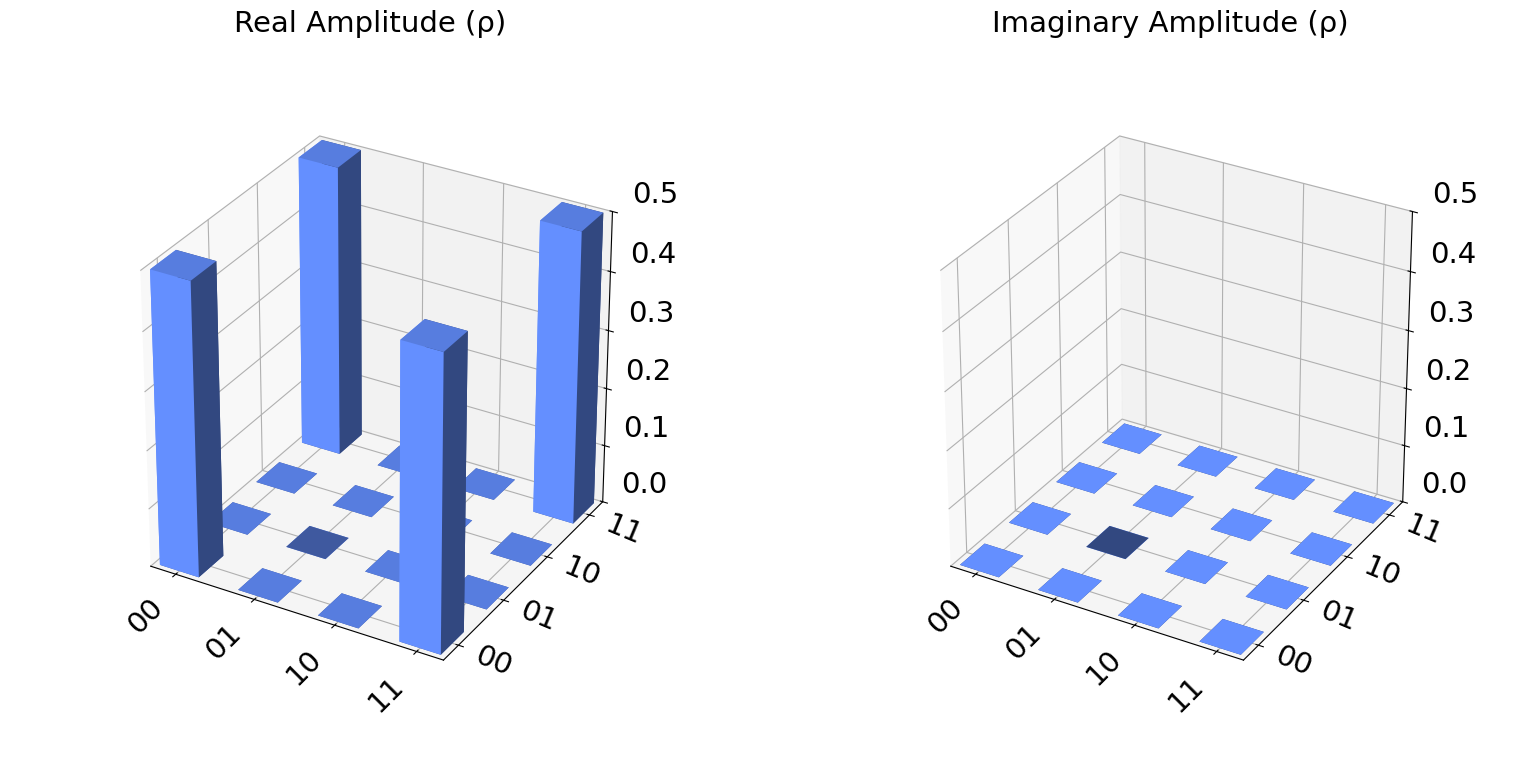

In [8]:
state = Statevector.from_instruction(qc_phi_plus)
plot_state_city(state)


### Bell State $|\Phi^{-}\rangle$
- $|\Phi^{-}\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)$ 

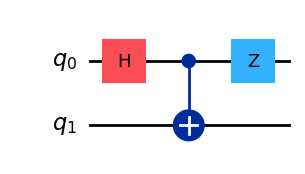

In [9]:
qc_phi_minus = QuantumCircuit(2)
qc_phi_minus.h(0)
qc_phi_minus.cx(0, 1)
qc_phi_minus.z(0)  # Phase flip
qc_phi_minus.draw("mpl")


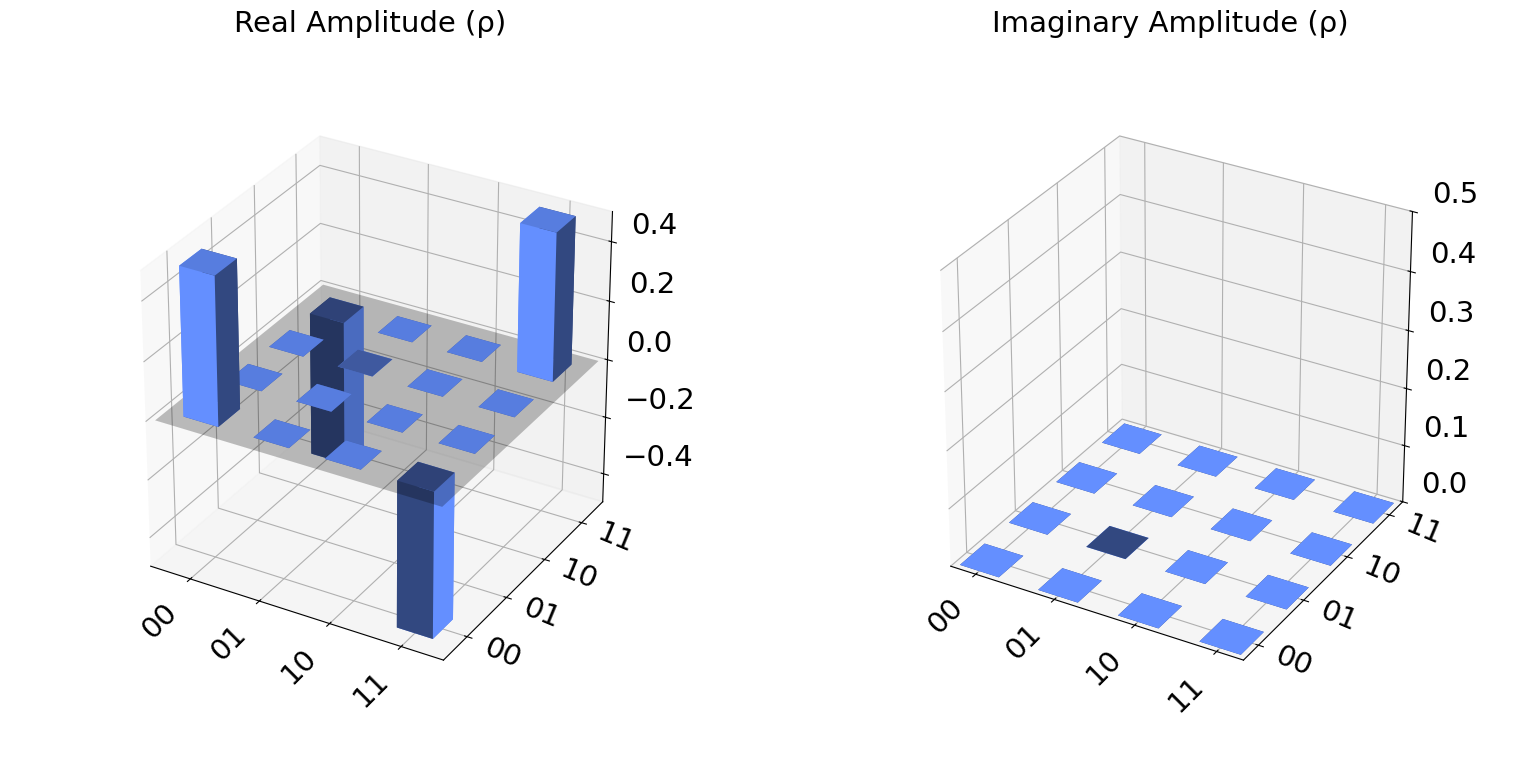

In [10]:
state = Statevector.from_instruction(qc_phi_minus)
plot_state_city(state)


### Bell State $|\Psi^{+}\rangle$
- $|\Psi^{+}\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$ 

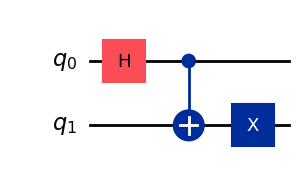

In [11]:
qc_psi_plus = QuantumCircuit(2)
qc_psi_plus.h(0)
qc_psi_plus.cx(0, 1)
qc_psi_plus.x(1)   # Flip target
qc_psi_plus.draw("mpl")


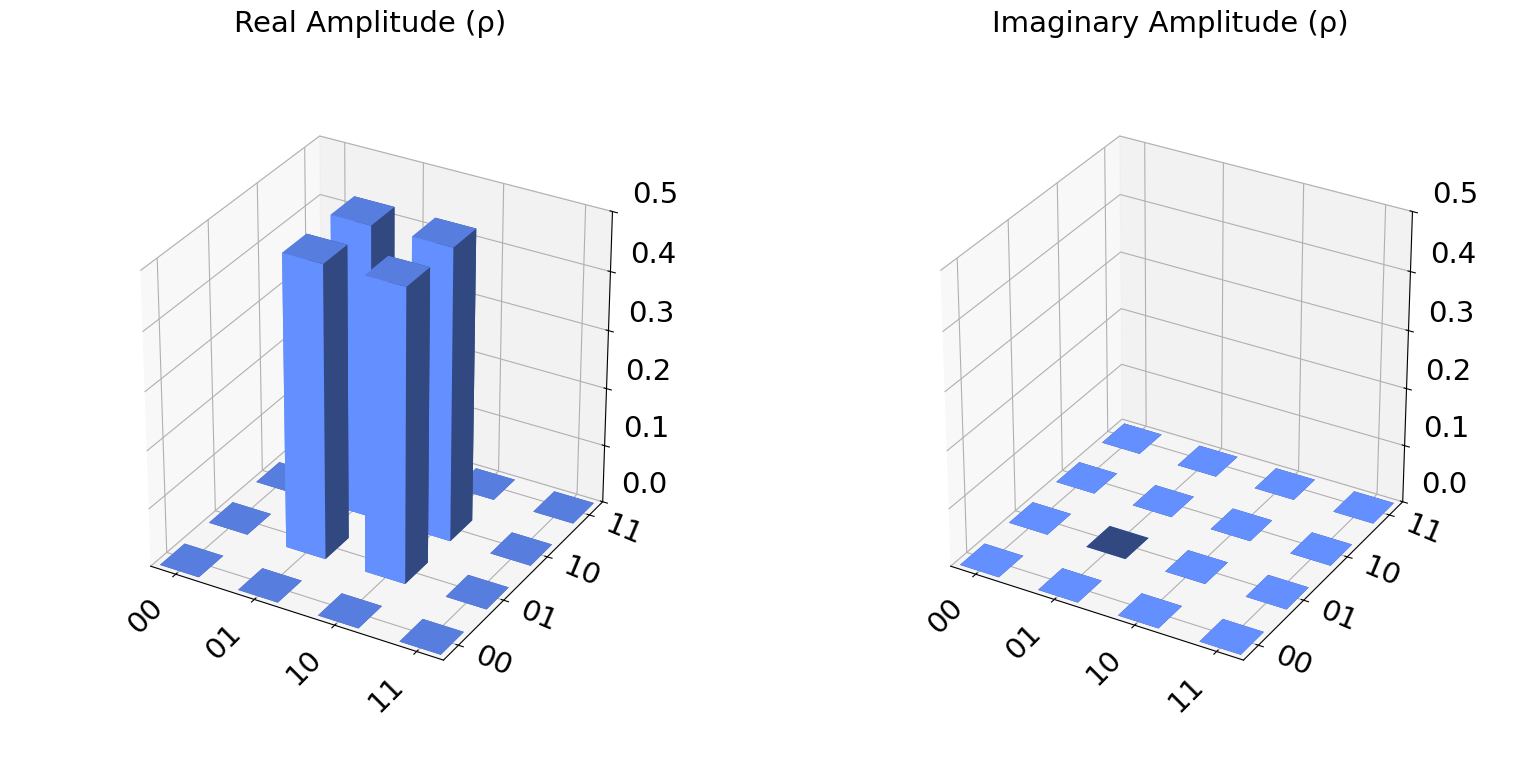

In [21]:
state = Statevector.from_instruction(qc_psi_plus)
plot_state_city(state)


### Bell State $|\Psi^{-}\rangle$
- $|\Psi^{-}\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)$  

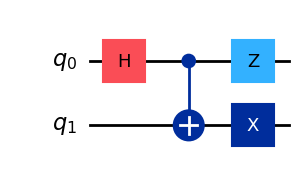

In [17]:
qc_psi_minus = QuantumCircuit(2)
qc_psi_minus.h(0)
qc_psi_minus.cx(0, 1)
qc_psi_minus.x(1)
qc_psi_minus.z(0)
qc_psi_minus.draw("mpl")

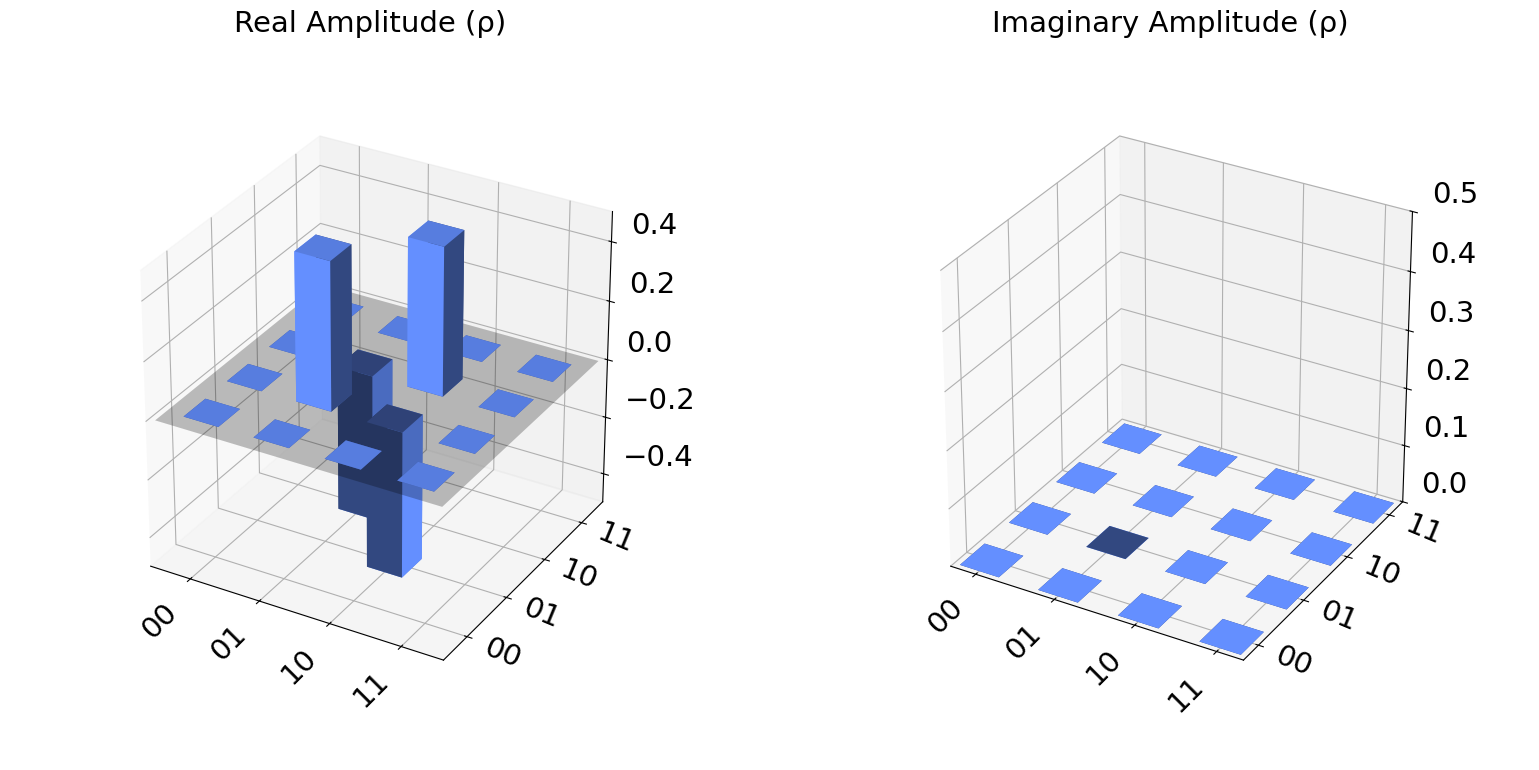

In [18]:
state = Statevector.from_instruction(qc_psi_minus)
plot_state_city(state)

 ### Simulate the Bell state:

## 1. Introduction
In quantum computing, **Bell states** are maximally entangled two-qubit states. They are important in quantum information, teleportation, and cryptography.

## 2. The Four Bell States

1. **Phi Plus**
   $$
   |\Phi^{+}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)
   $$
   - Probabilities: 50% `|00⟩`, 50% `|11⟩`

2. **Phi Minus**
   $$
   |\Phi^{-}\rangle = \frac{1}{\sqrt{2}} (|00\rangle - |11\rangle)
   $$
   - Probabilities: 50% `|00⟩`, 50% `|11⟩` (with a relative phase difference)

3. **Psi Plus**
   $$
   |\Psi^{+}\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)
   $$
   - Probabilities: 50% `|01⟩`, 50% `|10⟩`

4. **Psi Minus**
   $$
   |\Psi^{-}\rangle = \frac{1}{\sqrt{2}} (|01\rangle - |10\rangle)
   $$
   - Probabilities: 50% `|01⟩`, 50% `|10⟩` (with a relative phase difference)

## 3. Implementation in a Quantum Circuit

To create a Bell state (for example, $|\Phi^+\rangle$):

1. Start with two qubits in state $|0\rangle|0\rangle$.
2. Apply a **Hadamard gate (H)** on the first qubit:  
   $$
   H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)
   $$
3. Apply a **CNOT gate** (control=first qubit, target=second qubit):  
   $$
   \text{CNOT} \Big(\frac{|0\rangle + |1\rangle}{\sqrt{2}} \otimes |0\rangle \Big) = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
   $$

### Circuit Diagram (ASCII)


In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


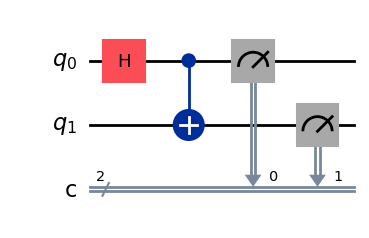

In [24]:
# 2 qubits and 2 classical bits
circuit = QuantumCircuit(2, 2)
# Step 1: Apply Hadamard gate to qubit 0
circuit.h(0)
# Step 2: Apply CNOT gate (control: 0, target: 1)
circuit.cx(0, 1)
# Step 3: Measure both qubits
circuit.measure([0, 1], [0, 1])
# Optional: Save the circuit diagram
circuit.draw(output='mpl', filename='bell_circuit.png')


In [29]:
# Simulation using QASM simulator
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
job = simulator.run(transpiled_circuit)
result = job.result()
counts = result.get_counts()
# Display results
print("Result:", result)
print("Counts:", counts)

Result: Result(backend_name='qasm_simulator', backend_version='0.17.1', job_id='5a78faff-45cc-42f2-ad8a-deece400c6d4', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 518, '0x0': 506}), header={'creg_sizes': [['c', 2]], 'global_phase': 0.0, 'memory_slots': 2, 'n_qubits': 2, 'name': 'circuit-189', 'qreg_sizes': [['q', 2]], 'metadata': {}}, status=DONE, seed_simulator=1005147390, metadata={'num_bind_params': 1, 'runtime_parameter_bind': False, 'parallel_state_update': 8, 'parallel_shots': 1, 'sample_measure_time': 0.001212561, 'noise': 'ideal', 'batched_shots_optimization': False, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'device': 'CPU', 'time_taken': 0.0017866, 'measure_sampling': True, 'num_clbits': 2, 'max_memory_mb': 16384, 'input_qubit_map': [[1, 1], [0, 0]], 'num_qubits': 2, 'method': 'stabilizer', 'required_memory_mb': 0, 'fusion': {'enabled': False}}, time_taken=0.0017866)], date=2025-08-19T1

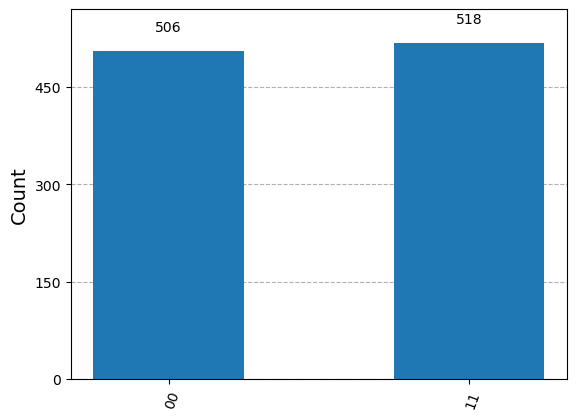

In [40]:
%matplotlib inline
plot_histogram(counts, filename='bell_histogram.png')
plt.show() 